# Download Target Data

##### Data 출처
- Source: [서울시 열린데이터](https://data.seoul.go.kr/dataList/419/S/2/datasetView.do)
- Data Download: [PinkWink Blog](https://pinkwink.kr/attachment/cfile1.uf@99740C3A5ECB0EA52889B3.txt)

##### 참고사항
* 데이터에 콤마(,)가 많아 CSV로 변환이 곤란하여, 탭으로 구분하여 TXT로 제공합니다
* 외국인 세대수 제외
* 65세이상 고령자 수: 외국인 포함

In [2]:
# Load DataFrame
import pandas as pd

df_target = pd.read_csv('./datas/report.txt', sep='\t', thousands=',')
df_target.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2020.1/4,합계,"4,354,006","10,013,781","4,874,995","5,138,786","9,733,655","4,742,217","4,991,438","280,126","132,778","147,348",2.24,"1,518,239"
3,2020.1/4,종로구,"74,151","161,984","78,271","83,713","151,217","73,704","77,513","10,767","4,567","6,200",2.04,"28,073"
4,2020.1/4,중구,"63,045","136,469","66,769","69,700","126,175","61,839","64,336","10,294","4,930","5,364",2,"23,794"


## DataFrame 불러오기 & 전처리

In [3]:
df_target=df_target.drop([0,1,2])
df_target.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
3,2020.1/4,종로구,"74,151","161,984","78,271","83,713","151,217","73,704","77,513","10,767","4,567","6,200",2.04,"28,073"
4,2020.1/4,중구,"63,045","136,469","66,769","69,700","126,175","61,839","64,336","10,294","4,930","5,364",2,"23,794"
5,2020.1/4,용산구,"110,895","246,165","119,961","126,204","229,579","110,667","118,912","16,586","9,294","7,292",2.07,"39,439"
6,2020.1/4,성동구,"135,643","307,193","149,891","157,302","299,042","146,300","152,742","8,151","3,591","4,560",2.2,"44,728"
7,2020.1/4,광진구,"165,287","365,990","176,226","189,764","350,417","169,568","180,849","15,573","6,658","8,915",2.12,"48,989"


In [4]:
df_target = df_target.reset_index(drop=True)
df_target.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,2020.1/4,종로구,"74,151","161,984","78,271","83,713","151,217","73,704","77,513","10,767","4,567","6,200",2.04,"28,073"
1,2020.1/4,중구,"63,045","136,469","66,769","69,700","126,175","61,839","64,336","10,294","4,930","5,364",2,"23,794"
2,2020.1/4,용산구,"110,895","246,165","119,961","126,204","229,579","110,667","118,912","16,586","9,294","7,292",2.07,"39,439"
3,2020.1/4,성동구,"135,643","307,193","149,891","157,302","299,042","146,300","152,742","8,151","3,591","4,560",2.2,"44,728"
4,2020.1/4,광진구,"165,287","365,990","176,226","189,764","350,417","169,568","180,849","15,573","6,658","8,915",2.12,"48,989"


- current_columns = ['기간', '자치구', '세대', '인구', '인구.1', '인구.2', '인구.3', '인구.4', '인구.5', '인구.6', '인구.7', '인구.8', '세대당인구', '65세이상고령자']
<br></br>
- new_columns = ['기간', '자치구', '세대', '합계', '남자', '여자', '한국인 계', '한국인 남자', '한국인 여자', '등록외국인 계', '등록외국인 남자', '등록외국인 여자', '세대당인구', '65세이상고령자']

In [6]:
# df_target.rename(columns = {'인구':'합계',
# '인구.1':'남자',
# '인구.2':'여자',
# '인구.3':'한국인 계',
# '인구.4':'한국인 남자',
# '인구.5':'한국인 여자',
# '인구.6':'등록외국인 계',
# '인구.7':'등록외국인 남자',
# '인구.8':'등록외국인 여자',
# },inplace=True)


In [7]:
df_target.columns=['기간', '자치구', '세대', '합계', '남자', '여자', '한국인 계', '한국인 남자', '한국인 여자', '등록외국인 계', '등록외국인 남자', '등록외국인 여자', '세대당인구', '65세이상고령자']

In [8]:
df_target.head()

,기간,자치구,세대,합계,남자,여자,한국인 계,한국인 남자,한국인 여자,등록외국인 계,등록외국인 남자,등록외국인 여자,세대당인구,65세이상고령자
0,2020.1/4,종로구,"74,151","161,984","78,271","83,713","151,217","73,704","77,513","10,767","4,567","6,200",2.04,"28,073"
1,2020.1/4,중구,"63,045","136,469","66,769","69,700","126,175","61,839","64,336","10,294","4,930","5,364",2,"23,794"
2,2020.1/4,용산구,"110,895","246,165","119,961","126,204","229,579","110,667","118,912","16,586","9,294","7,292",2.07,"39,439"
3,2020.1/4,성동구,"135,643","307,193","149,891","157,302","299,042","146,300","152,742","8,151","3,591","4,560",2.2,"44,728"
4,2020.1/4,광진구,"165,287","365,990","176,226","189,764","350,417","169,568","180,849","15,573","6,658","8,915",2.12,"48,989"


### 천단위 구분자 " , "를 제거하고, data의 type을 int 또는 float으로 변경
- 기간, 자치구: 변경 없음

- '세대', '합계', '남자', '여자', '한국인 계', '한국인 남자', '한국인 여자', '등록외국인 계', '등록외국인 남자', '등록외국인 여자', '65세이상고령자': 천단위 구분자 "," 제거 및 int로 타입 변경

In [10]:
df_target['세대']=df_target['세대'].str.replace(pat=r'[^\w]', repl=r'', regex=True).astype('int64')
df_target['합계']=df_target['합계'].str.replace(pat=r'[^\w]', repl=r'', regex=True).astype('int64')
df_target['남자']=df_target['남자'].str.replace(pat=r'[^\w]', repl=r'', regex=True).astype('int64')
df_target['여자']=df_target['여자'].str.replace(pat=r'[^\w]', repl=r'', regex=True).astype('int64')
df_target['한국인 계']=df_target['한국인 계'].str.replace(pat=r'[^\w]', repl=r'', regex=True).astype('int64')
df_target['한국인 남자']=df_target['한국인 남자'].str.replace(pat=r'[^\w]', repl=r'', regex=True).astype('int64')
df_target['한국인 여자']=df_target['한국인 여자'].str.replace(pat=r'[^\w]', repl=r'', regex=True).astype('int64')
df_target['등록외국인 계']=df_target['등록외국인 계'].str.replace(pat=r'[^\w]', repl=r'', regex=True).astype('int64')
df_target['등록외국인 남자']=df_target['등록외국인 남자'].str.replace(pat=r'[^\w]', repl=r'', regex=True).astype('int64')
df_target['등록외국인 여자']=df_target['등록외국인 여자'].str.replace(pat=r'[^\w]', repl=r'', regex=True).astype('int64')
df_target['65세이상고령자']=df_target['65세이상고령자'].str.replace(pat=r'[^\w]', repl=r'', regex=True).astype('int64')

df_target['세대당인구']=df_target['세대당인구'].astype('float')


In [11]:
df_target.head()

,기간,자치구,세대,합계,남자,여자,한국인 계,한국인 남자,한국인 여자,등록외국인 계,등록외국인 남자,등록외국인 여자,세대당인구,65세이상고령자
0,2020.1/4,종로구,74151,161984,78271,83713,151217,73704,77513,10767,4567,6200,2.04,28073
1,2020.1/4,중구,63045,136469,66769,69700,126175,61839,64336,10294,4930,5364,2.00,23794
2,2020.1/4,용산구,110895,246165,119961,126204,229579,110667,118912,16586,9294,7292,2.07,39439
3,2020.1/4,성동구,135643,307193,149891,157302,299042,146300,152742,8151,3591,4560,2.20,44728
4,2020.1/4,광진구,165287,365990,176226,189764,350417,169568,180849,15573,6658,8915,2.12,48989


In [12]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   기간        25 non-null     object 
 1   자치구       25 non-null     object 
 2   세대        25 non-null     int64  
 3   합계        25 non-null     int64  
 4   남자        25 non-null     int64  
 5   여자        25 non-null     int64  
 6   한국인 계     25 non-null     int64  
 7   한국인 남자    25 non-null     int64  
 8   한국인 여자    25 non-null     int64  
 9   등록외국인 계   25 non-null     int64  
 10  등록외국인 남자  25 non-null     int64  
 11  등록외국인 여자  25 non-null     int64  
 12  세대당인구     25 non-null     float64
 13  65세이상고령자  25 non-null     int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 2.9+ KB


#### 서울시는 아래와 같이 5개의 권역으로 구분됩니다.
![서울시 권역생활권](https://www.seoulsolution.kr/sites/default/files/images/%EC%B2%B4%EA%B3%846.jpg)
- ref: [서울시-도시계획체계](https://www.seoulsolution.kr/ko/content/서울시-도시계획체계)

- 도심권: ['종로구', '중구', '용산구']
- 동북권: ['성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구', '노원구']
- 서북권: ['은평구', '서대문구', '마포구']
- 서남권: ['양천구', '강서구', '구로구', '금천구', '영등포구', '동작구', '관악구']
- 동남권: ['서초구', '강남구', '송파구', '강동구']
***

In [14]:
region_dict = {'도심권': ['종로구', '중구', '용산구'],
               '동북권': ['성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구', '노원구'],
               '서북권': ['은평구', '서대문구', '마포구'],
               '서남권': ['양천구', '강서구', '구로구', '금천구', '영등포구', '동작구', '관악구'],
               '동남권': ['서초구', '강남구', '송파구', '강동구']
               }

In [15]:
권역 = []

for row in df_target['자치구']:
    if row in ('종로구','중구','용산구'):
        권역.append('도심권')
    elif row in ('은평구', '서대문구', '마포구'):
        권역.append('서북권')
    elif row in ('양천구', '강서구', '구로구', '금천구', '영등포구', '동작구', '관악구'):
        권역.append('서남권')
    elif row in ('서초구', '강남구', '송파구', '강동구'):
        권역.append('동남권')
    else:
        권역.append('동북권')       

df_target['권역'] = 권역

In [16]:
df_target.head()

,기간,자치구,세대,합계,남자,여자,한국인 계,한국인 남자,한국인 여자,등록외국인 계,등록외국인 남자,등록외국인 여자,세대당인구,65세이상고령자,권역
0,2020.1/4,종로구,74151,161984,78271,83713,151217,73704,77513,10767,4567,6200,2.04,28073,도심권
1,2020.1/4,중구,63045,136469,66769,69700,126175,61839,64336,10294,4930,5364,2.00,23794,도심권
2,2020.1/4,용산구,110895,246165,119961,126204,229579,110667,118912,16586,9294,7292,2.07,39439,도심권
3,2020.1/4,성동구,135643,307193,149891,157302,299042,146300,152742,8151,3591,4560,2.20,44728,동북권
4,2020.1/4,광진구,165287,365990,176226,189764,350417,169568,180849,15573,6658,8915,2.12,48989,동북권


In [17]:
df_target.isnull().sum()

기간          0
자치구         0
세대          0
합계          0
남자          0
여자          0
한국인 계       0
한국인 남자      0
한국인 여자      0
등록외국인 계     0
등록외국인 남자    0
등록외국인 여자    0
세대당인구       0
65세이상고령자    0
권역          0
dtype: int64

- 구할 값: ['합계', '세대', '여자', '한국인 계', '등록외국인 계', '65세이상고령자']

In [19]:
import numpy as np

In [36]:
df1=pd.pivot_table(df_target,
                index = ['권역'],
                values=['합계', '세대', '여자', '한국인 계', '등록외국인 계', '65세이상고령자'],
                aggfunc=sum,).sort_values(by=['합계'], ascending=False)

In [37]:
df1

,65세이상고령자,등록외국인 계,세대,여자,한국인 계,합계
권역,,,,,,
동북권,497385,67938,1342778,1580313,3008988,3076926
서남권,454108,124791,1360162,1554745,2950352,3075143
동남권,286874,20511,876524,1097300,2102113,2122624
서북권,188566,29239,526451,626811,1165231,1194470
도심권,91306,37647,248091,279617,506971,544618


###  ['고령자비율', '외국인비율', '여성비율', '세대당인구'] 컬럼을 만들어 아래와 같이 값을 입력하고 '외국인비율'을 기준으로 오름차순 정렬

- 고령자비율: 65세이상고령자 / 합계 * 100

- 외국인비율: 등록외국인 계 / 합계 * 100

- 여성비율: 여자 / 합계 * 100

- 세대당인구: (합계 - 등록외국인 계) / 세대
- 예시: B/C 비율 및  B 기준 오름차순 정렬

In [74]:
def older_calc(a):
    result = df_target['65세이상고령자']/df_target['합계']*100
    return result

def foreign_calc(b):
    result = df_target['등록외국인 계']/df_target['합계']*100
    return result

def women_calc(c):
    result = df_target['여자']/df_target['합계']*100
    return result

def house_calc(d):
    result = (df_target['합계']-df_target['등록외국인 계'])/df_target['세대']
    return result

In [40]:
df2 = df1

In [41]:
df2['고령자비율']=older_calc('권역')
df2['외국인비율']=foreign_calc('권역')
df2['여성비율']=women_calc('권역')
df2['세대당인구']=house_calc('권역')

In [42]:
df2=df2.sort_values(by=['외국인비율'],ascending=True)

In [43]:
df2

,65세이상고령자,등록외국인 계,세대,여자,한국인 계,합계,고령자비율,외국인비율,여성비율,세대당인구
권역,,,,,,,,,,
동남권,286874,20511,876524,1097300,2102113,2122624,13.515064,0.966304,51.695449,2.398238
동북권,497385,67938,1342778,1580313,3008988,3076926,16.164997,2.207983,51.360124,2.240868
서북권,188566,29239,526451,626811,1165231,1194470,15.786583,2.447864,52.476077,2.213370
서남권,454108,124791,1360162,1554745,2950352,3075143,14.767053,4.058055,50.558462,2.169118
도심권,91306,37647,248091,279617,506971,544618,16.765145,6.912552,51.341858,2.043488


 각 구별 ['고령자비율', '외국인비율', '여성비율'] 컬럼을 만들어 아래와 같이 값을 입력하고 '세대당인구'을 기준으로 내림차순 정렬
- 고령자비율: 65세이상고령자 / 합계 * 100
- 외국인비율: 등록외국인 계 / 합계 * 100
- 여성비율: 여자 / 합계 * 100
- 완료 후 결과 dataframe 변수를 check_02_04 함수에 입력하여 채점하세요.

In [47]:
df3=df2.sort_values(by=['세대당인구'], ascending=False)

,65세이상고령자,등록외국인 계,세대,여자,한국인 계,합계,고령자비율,외국인비율,여성비율,세대당인구
권역,,,,,,,,,,
동남권,286874,20511,876524,1097300,2102113,2122624,13.515064,0.966304,51.695449,2.398238
동북권,497385,67938,1342778,1580313,3008988,3076926,16.164997,2.207983,51.360124,2.240868
서북권,188566,29239,526451,626811,1165231,1194470,15.786583,2.447864,52.476077,2.213370
서남권,454108,124791,1360162,1554745,2950352,3075143,14.767053,4.058055,50.558462,2.169118
도심권,91306,37647,248091,279617,506971,544618,16.765145,6.912552,51.341858,2.043488


In [49]:
df3=df3.drop(columns='세대당인구')

In [51]:
df3

,65세이상고령자,등록외국인 계,세대,여자,한국인 계,합계,고령자비율,외국인비율,여성비율
권역,,,,,,,,,
동북권,497385,67938,1342778,1580313,3008988,3076926,16.164997,2.207983,51.360124
서남권,454108,124791,1360162,1554745,2950352,3075143,14.767053,4.058055,50.558462
동남권,286874,20511,876524,1097300,2102113,2122624,13.515064,0.966304,51.695449
서북권,188566,29239,526451,626811,1165231,1194470,15.786583,2.447864,52.476077
도심권,91306,37647,248091,279617,506971,544618,16.765145,6.912552,51.341858


###  ['고령자비율', '외국인비율', '여성비율', '세대당인구']간의 피어슨 상관계수 행렬(Correlation matrix)를 구하기

- 참고
    - 상관계수(correlation coefficient): 두 변수가 함께 변하는 정도를 -1 ~ +1 범위의 수로 나타낸 것

    - 피어슨 상관계수: 칼 피어슨(Karl Pearson)이 개발한 상관계수로, 일반적으로 상관계수라고 하면 피어슨 상관계수를 말함
        - Standard Correlation Coefficient
        - r(상관계수) = X와 Y가 함께 변하는 정도 / X와 Y가 각각 변하는 정도
<br></br>
    - 상관계수 행렬(Correlation Matrix): 변수간 상관계수를 보여주는 행렬
<br></br>

In [56]:
df_cor = df2[['고령자비율','외국인비율', '여성비율', '세대당인구']]
df_cor

,고령자비율,외국인비율,여성비율,세대당인구
권역,,,,
동남권,13.515064,0.966304,51.695449,2.398238
동북권,16.164997,2.207983,51.360124,2.240868
서북권,15.786583,2.447864,52.476077,2.213370
서남권,14.767053,4.058055,50.558462,2.169118
도심권,16.765145,6.912552,51.341858,2.043488


In [57]:
df_cor2 = df_cor.corr()
df_cor2

,고령자비율,외국인비율,여성비율,세대당인구
고령자비율,1.000000,0.655428,0.079476,-0.809536
외국인비율,0.655428,1.000000,-0.380941,-0.943776
여성비율,0.079476,-0.380941,1.000000,0.283602
세대당인구,-0.809536,-0.943776,0.283602,1.000000


## 시각화

In [60]:
# # 한글 설정(Mac)
# import matplotlib.pyplot as plt
# from matplotlib import font_manager, rc

# %matplotlib inline

# plt.rcParams['axes.unicode_minus'] = False

# f_path = '/Library/Fonts/Arial Unicode.ttf'
# font_name = font_manager.FontProperties(fname=f_path).get_name()
# rc('font', family=font_name)

In [61]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

### 자치구별 고령자비율을 내림차순에 따라 bar 그래프로 시각화

In [62]:
df_target.head()

,기간,자치구,세대,합계,남자,여자,한국인 계,한국인 남자,한국인 여자,등록외국인 계,등록외국인 남자,등록외국인 여자,세대당인구,65세이상고령자,권역
0,2020.1/4,종로구,74151,161984,78271,83713,151217,73704,77513,10767,4567,6200,2.04,28073,도심권
1,2020.1/4,중구,63045,136469,66769,69700,126175,61839,64336,10294,4930,5364,2.00,23794,도심권
2,2020.1/4,용산구,110895,246165,119961,126204,229579,110667,118912,16586,9294,7292,2.07,39439,도심권
3,2020.1/4,성동구,135643,307193,149891,157302,299042,146300,152742,8151,3591,4560,2.20,44728,동북권
4,2020.1/4,광진구,165287,365990,176226,189764,350417,169568,180849,15573,6658,8915,2.12,48989,동북권


In [75]:
df_target['고령자비율']=older_calc('자치구')

In [76]:
df_target = df_target.sort_values(by='고령자비율', ascending=False)

<AxesSubplot:xlabel='고령자비율', ylabel='자치구'>

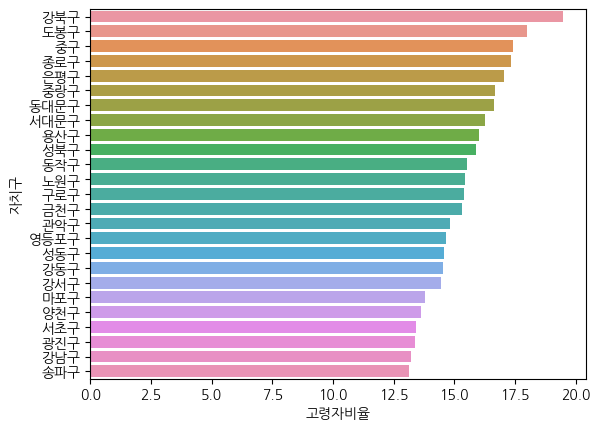

In [77]:
sns.barplot(x='고령자비율', y='자치구', data=df_target, orient='h')

### 권역별 등록외국인 계를 PIE chart로 시각화


In [98]:
df1

,65세이상고령자,등록외국인 계,세대,여자,한국인 계,합계,고령자비율,외국인비율,여성비율,세대당인구
권역,,,,,,,,,,
동북권,497385,67938,1342778,1580313,3008988,3076926,16.164997,2.207983,51.360124,2.240868
서남권,454108,124791,1360162,1554745,2950352,3075143,14.767053,4.058055,50.558462,2.169118
동남권,286874,20511,876524,1097300,2102113,2122624,13.515064,0.966304,51.695449,2.398238
서북권,188566,29239,526451,626811,1165231,1194470,15.786583,2.447864,52.476077,2.213370
도심권,91306,37647,248091,279617,506971,544618,16.765145,6.912552,51.341858,2.043488


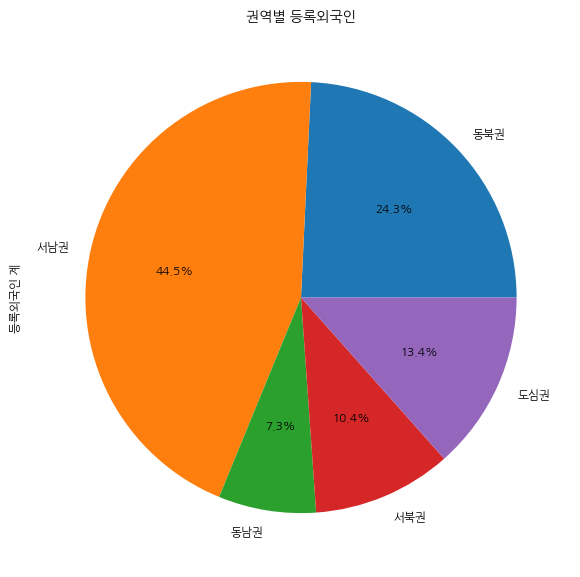

In [103]:
plt.title('권역별 등록외국인')
plt.rc('font', size=8.5) 

df1['등록외국인 계'].plot(kind='pie', figsize=(7,7), autopct='%1.1f%%')
plt.show()

### 자치구별 외국인비율-세대당인구를 Scatter plot에 나타내고, 상관관계에 따른 Regression Line을 시각화

In [117]:
df_target['고령자비율']=older_calc('자치구')
df_target['외국인비율']=foreign_calc('권역')
df_target['여성비율']=women_calc('권역')
df_target['세대당인구']=house_calc('권역')

In [119]:
df_target.head()

,기간,자치구,세대,합계,남자,여자,한국인 계,한국인 남자,한국인 여자,등록외국인 계,등록외국인 남자,등록외국인 여자,세대당인구,65세이상고령자,권역,고령자비율,등록외국인,외국인비율,여성비율
8,2020.1/4,강북구,144805,316750,154141,162609,312985,152747,160238,3765,1394,2371,2.161424,61660,동북권,19.466456,1.188635,1.188635,51.336701
9,2020.1/4,도봉구,138595,333495,162774,170721,331238,161879,169359,2257,895,1362,2.389971,60023,동북권,17.998171,0.676772,0.676772,51.191472
1,2020.1/4,중구,63045,136469,66769,69700,126175,61839,64336,10294,4930,5364,2.001348,23794,도심권,17.435462,7.543105,7.543105,51.073870
0,2020.1/4,종로구,74151,161984,78271,83713,151217,73704,77513,10767,4567,6200,2.039312,28073,도심권,17.330724,6.646953,6.646953,51.679796
11,2020.1/4,은평구,208209,482509,231953,250556,478019,230147,247872,4490,1806,2684,2.295861,82245,서북권,17.045278,0.930553,0.930553,51.927736


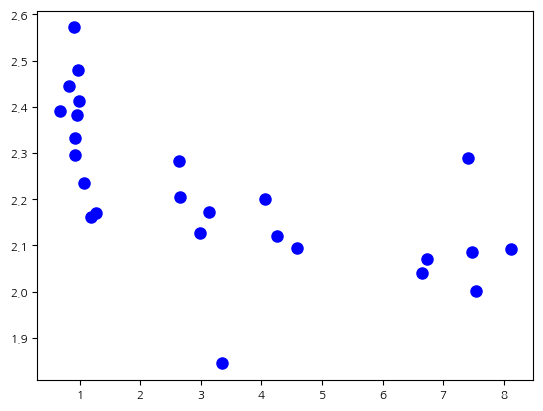

In [121]:
plt.plot('외국인비율',
        '세대당인구',
        data = df_target,
        linestyle='none',
        marker='o',
        markersize=8,
        color='blue')
plt.show()

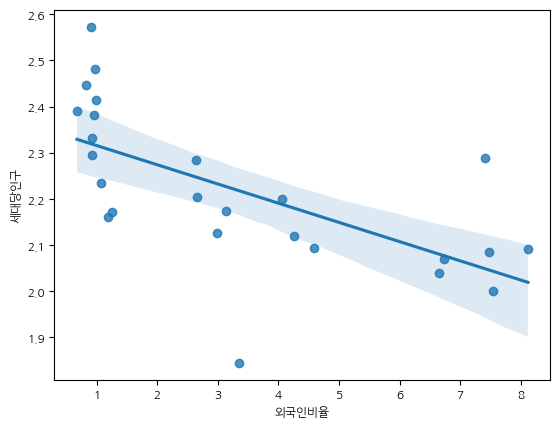

In [122]:
sns.regplot(x=df_target['외국인비율'],
            y=df_target['세대당인구'],
            fit_reg=True)

plt.show()